Code link: https://www.google.com/url?q=https%3A%2F%2Fwww.kaggle.com%2Fdatasets%2Fuciml%2Fbreast-cancer-wisconsin-data

# Dataset Description – Breast Cancer Dataset

The dataset used in this project is the Breast Cancer Wisconsin (Diagnostic) dataset.
It contains 569 patient records with 33 columns (features + ID + target).

# Structure

Rows: 569 samples (patients).

Columns: 33 in total.

ID column: id → patient identifier (not useful for prediction).

Target column: diagnosis

M = Malignant (cancerous)

B = Benign (non-cancerous)

30 numerical features describing cell nuclei characteristics computed from a digitized image of a breast mass.

Extra column: Unnamed: 32 → contains only missing values (should be dropped)
# Basic Geometry Features

radius: Mean distance from the center to points on the perimeter.

texture: Standard deviation of gray-scale values (image texture).

perimeter: Length of the tumor boundary.

area: Size of the tumor region.

smoothness: Variation in radius lengths (local smoothness of the contour).

compactness: Perimeter² / Area – 1.0 (measures compactness of shape).

concavity: Severity of concave portions of the contour.

concave points: Number of concave portions in the contour.

symmetry: Symmetry of the tumor shape.

fractal dimension: "Coastline approximation" – complexity of the contour.

# Groups of Measurements

Each of the above 10 features is measured in three forms:

Mean (e.g., radius_mean, texture_mean)
→ Average value for the cell nuclei.

Standard Error (SE) (e.g., radius_se, texture_se)
→ Variation or error estimate of the feature.

Worst (e.g., radius_worst, texture_worst)
→ Maximum (or largest mean value) observed for the feature.

# Example Columns

radius_mean: Average tumor radius.

texture_se: Standard error of texture.

area_worst: Largest area value for a tumor.

concavity_mean: Average concavity severity.

fractal_dimension_worst: Maximum contour complexity.

# Target Column

diagnosis: Tumor type

M = Malignant (cancerous)

B = Benign (non-cancerous)

# In summary:
The dataset provides a comprehensive description of cell nuclei shape and structure, using 30 features derived from medical imaging. These features help machine learning models differentiate between benign and malignant tumors.

Data loading / cleaning / exploration:

load_data

explore_data

handle_missing

clean_data

Preprocessing:

split_xy

preprocess_features

build_preprocessor

Train/Test split:

split_data

Model training & evaluation (classification models ):

SVC

LogisticRegression

RandomForestClassifier

KNeighborsClassifier

Evaluation metrics:

accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay

# 1. Import Required Libraries

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder,MinMaxScaler,LabelEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
# Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
# Evaluation Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score
#Save trained models
import joblib
import os

# 2. Data Loading and Cleaning

In [42]:
#Reads the dataset from a CSV file
file_path ='/content/Breast cancer datast.csv'
def load_data(file_path):
  df= pd.read_csv(file_path)
  return df

In [43]:
#Display dataset dimensions, sample rows, info, statistical summary, missing values, and unique values
def explore_data(df):
    print("Shape of data:", df.shape)
    print(df.head())
    print(df.info())
    print(df.describe())
    print("Missing values per column:\n", df.isnull().sum())
    print("Unique values per column:\n", df.nunique())

In [44]:
#Fill missing categorical values with mode.
#Fill missing numerical values with median.
def handle_missing(df):
    for col in df.columns:
        if df[col].dtype == "object":
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            df[col] = df[col].fillna(df[col].median())
    print("Missing Values Filled")
    return df

In [45]:
#Drop irrelevant columns
def clean_data(data):
    return data.drop(columns=["id", "Unnamed: 32"], errors="ignore")

# 3. Preprocessing

In [46]:
#Separate independent variables (X) and target variable (y)
def split_xy(df, target_col):
    x = df.drop(columns=[target_col])
    y = df[target_col]
    return x, y

In [47]:
#Encode the target variable (y) using Label Encoding.
#Identify numerical features.
#Build a numeric preprocessing pipeline:
#Impute missing values with median.
#Standardize features
def preprocess_features(x, y):
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
    num_features = x.select_dtypes(include=["int64", "float64"]).columns.tolist()
    numeric_transformer = Pipeline(steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

    return y_encoded, num_features, numeric_transformer

In [48]:
#Create a ColumnTransformer to apply the numeric pipeline only to numerical features
def build_preprocessor(numeric_transformer, num_features):
    preprocessor = ColumnTransformer(
        transformers=[("num", numeric_transformer, num_features)],
        remainder="drop"
    )
    return preprocessor

# 4. Train/Test Split

In [49]:
#Split data into training and testing sets with stratified sampling to preserve class balance
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    print("Train shape:", X_train.shape)
    print("Test shape:", X_test.shape)
    print("Target distribution:", {0: (y == 0).sum(), 1: (y == 1).sum()})

    return X_train, X_test, y_train, y_test

# 5. Model Training and Evaluation

In [50]:
#Train the model inside a pipeline (with preprocessing) and evaluate performance on test data.
def train_and_evaluate(model, preprocessor, X_train, X_test, y_train, y_test):
    clf = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    print(f"Model: {model.__class__.__name__}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score : {f1:.4f}")

    # Show confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap="Blues")
    plt.show()

    return clf

#6. Confusion Matrix Plot

In [51]:
#Plot confusion matrix for classification results.
def plot_confusion(y_test, y_pred, model_name="Model"):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{model_name} - Confusion Matrix")
    plt.show()

# 7. Visualization/Comparison

In [52]:
def plot_classification_results(results_clf):
    df_clf = pd.DataFrame(results_clf).T
    df_clf.plot(kind="bar", figsize=(10,6))
    plt.title("Classification Metrics Comparison")
    plt.ylabel("Score")
    plt.xticks(rotation=45)
    plt.legend(loc="best")
    plt.show()

# 8.Save Model Function

In [53]:
#Save the trained model using joblib.
def save_model(model, filename="model.pkl"):
    joblib.dump(model, filename)
    print(f"Model saved as '{filename}'")

# 9.Selecting the best model based on accuracy

In [54]:
# Select the best model based on the chosen metric (default = accuracy)
def evaluate_best_model(results_clf, trained_models, X_test, y_test, metric="Accuracy"):
    best_model_name = max(results_clf, key=lambda x: results_clf[x][metric])
    best_model = trained_models[best_model_name]
    best_score = results_clf[best_model_name][metric]

    print(f"Best Model: {best_model_name} ({metric}: {best_score:.4f})")

    # Predict with the best model
    y_pred = best_model.predict(X_test)

    # Plot Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title(f"{best_model_name} - Confusion Matrix")
    plt.show()

    # Calculate evaluation metrics
    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred)
    }

    # Plot bar chart for performance metrics
    plt.bar(metrics.keys(), metrics.values(), color="skyblue")
    plt.title(f"{best_model_name} - Performance Metrics")
    plt.ylabel("Score")
    plt.ylim(0, 1)
    plt.show()

    return best_model_name, best_model, metrics

# 10. Main Script

Shape of data: (569, 33)
         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_wors

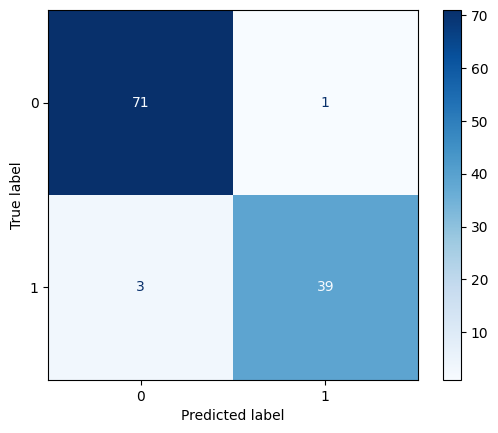

Model: SVC
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1 Score : 0.9630


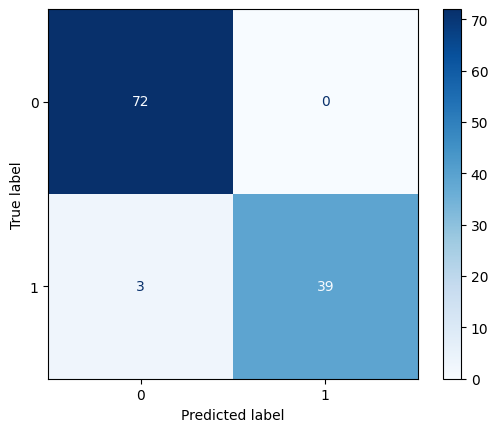

Model: RandomForestClassifier
Accuracy: 0.9737
Precision: 1.0000
Recall: 0.9286
F1 Score : 0.9630


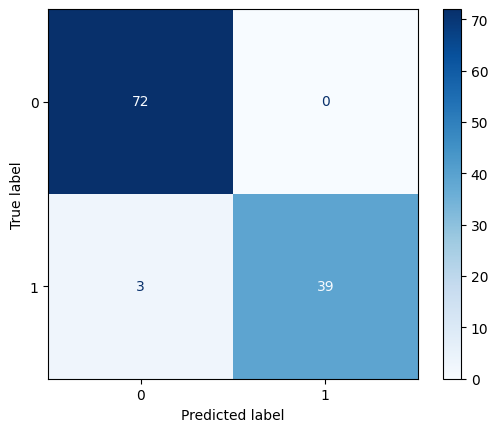

Model: KNeighborsClassifier
Accuracy: 0.9561
Precision: 0.9744
Recall: 0.9048
F1 Score : 0.9383


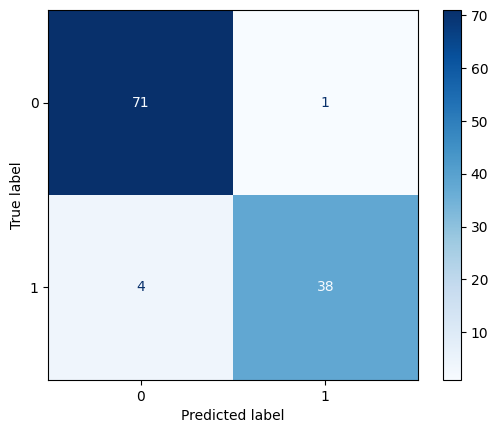

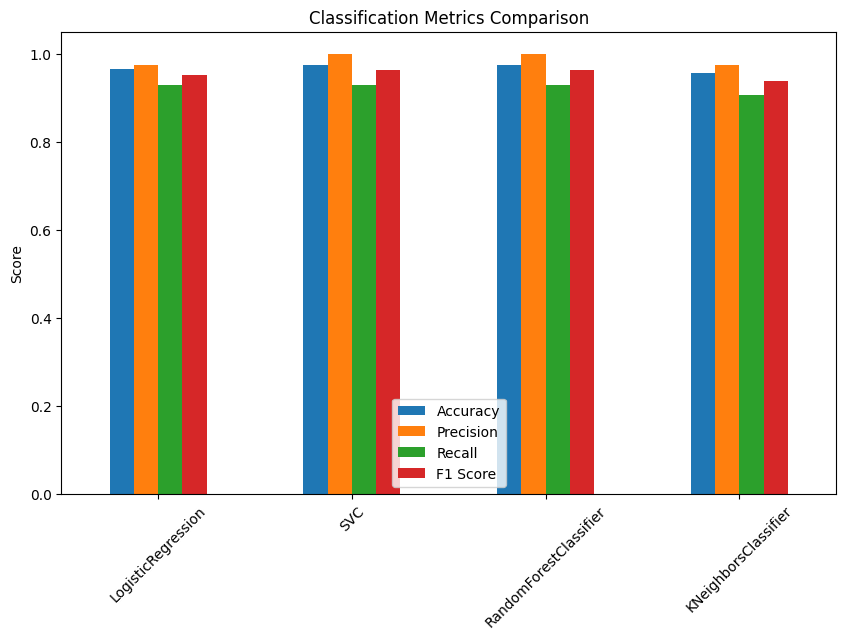

Best Model: SVC (Accuracy: 0.9737)


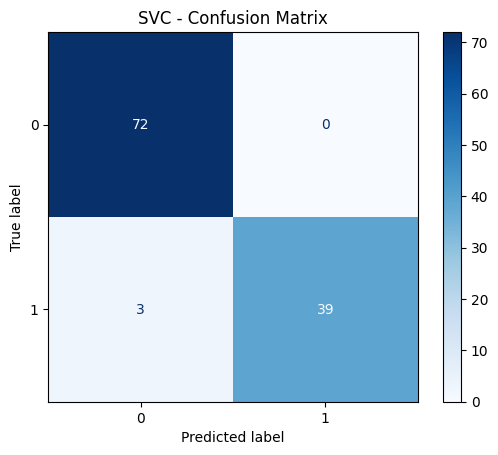

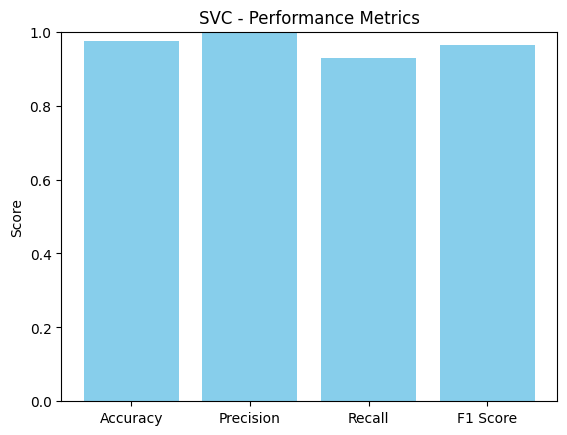

Model saved as 'svc_breast_cancer_model.pkl'


In [55]:
if __name__ == "__main__":
    # Load and prepare dataset
    df = load_data("Breast cancer datast.csv")
    explore_data(df)
    df = handle_missing(df)
    df = clean_data(df)

    # Split features and target
    X, y = split_xy(df, "diagnosis")
    y_encoded, num_features, numeric_transformer = preprocess_features(X, y)
    preprocessor = build_preprocessor(numeric_transformer, num_features)

    # Train/test split
    X_train, X_test, y_train, y_test = split_data(X, y_encoded)

    # Models to test
    models = [
        LogisticRegression(max_iter=500),
        SVC(kernel="rbf", probability=True),
        RandomForestClassifier(n_estimators=100, random_state=42),
        KNeighborsClassifier(n_neighbors=5)
    ]

    trained_models = {}
    results_clf = {}
    for model in models:
        clf = train_and_evaluate(model, preprocessor, X_train, X_test, y_train, y_test)
        trained_models[model.__class__.__name__] = clf
        # Store evaluation results
        y_pred = clf.predict(X_test)
        results_clf[model.__class__.__name__] = {
            "Accuracy": accuracy_score(y_test, y_pred),
            "Precision": precision_score(y_test, y_pred),
            "Recall": recall_score(y_test, y_pred),
            "F1 Score": f1_score(y_test, y_pred)
        }

    plot_classification_results(results_clf)
    # Select the best model based on accuracy and plot its metrics and confusion matrix
    best_model_name, best_model, best_metrics = evaluate_best_model(results_clf, trained_models, X_test, y_test, metric="Accuracy")

    # Save the best model
    save_model(best_model, f"{best_model_name.lower()}_breast_cancer_model.pkl")